In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

/Users/edy/lib/build/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [19]:
def poisson_interval(k, alpha=0.05): 
    """
    uses chisquared info to get the poisson interval. Uses scipy.stats 
    (imports in function). 
    """
    from scipy.stats import chi2
    a = alpha
    low, high, high_1s = (chi2.ppf(a/2, 2*k) / 2, chi2.ppf(1-a/2, 2*k + 2) / 2,  chi2.ppf(1-a, 2*k + 2) / 2)
    if k == 0: 
        low = 0.0
    return low, high, high_1s

In [20]:
scipy.stats.poisson.ppf

<bound method rv_discrete.ppf of <scipy.stats._discrete_distns.poisson_gen object at 0x1810d6d400>>

In [21]:
nsamples = 10000

In [22]:
mu_true = 1000

In [23]:
X = scipy.stats.poisson.rvs(mu=mu_true, size=nsamples)

In [24]:
CI = np.array([poisson_interval(x) for x in X])

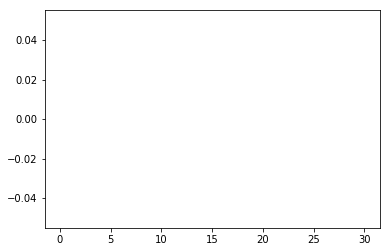

In [25]:
fig, ax = plt.subplots()
ax.hist(X, bins=30, range=(0, 30));

In [26]:
experiments = np.c_[X, CI]

Text(0.5,1,'One-sided Upper limit')

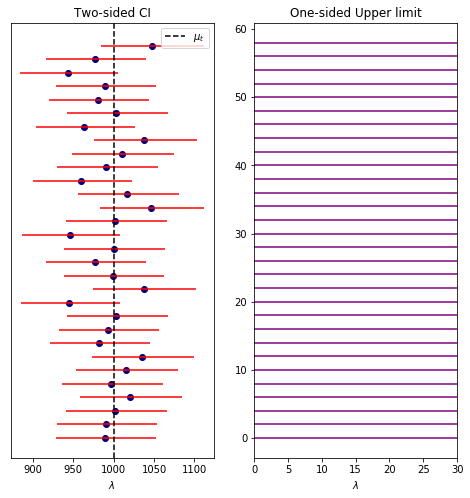

In [27]:
fig, axes = plt.subplots(ncols=2, figsize=(8,8))
ax = axes.flatten()
ax[0].axvline(mu_true, linestyle='--', label=r"$\mu_{t}$", c='k')
ax[1].axvline(mu_true, linestyle='--', label=r"$\mu_{t}$", c='k')
for i, experiment in enumerate(experiments[:30]):
    x = experiment[0]
    CI_low  = experiment[1]
    CI_high = experiment[2]
    CI_high_1s = experiment[3]
    ax[0].scatter(x, 2*i, c='navy',)
    ax[0].hlines(2*i, xmin=CI_low, xmax=CI_high, colors='r')
    ax[1].hlines(2*i, xmin=-1000, xmax=CI_high_1s, colors='purple')
ax[0].legend()
ax[1].set_xlim(0.0, 30.0)
ax[0].get_yaxis().set_visible(False)
ax[0].set_xlabel(r"$\lambda$")
ax[1].set_xlabel(r"$\lambda$")
ax[0].set_title(r"Two-sided CI")
ax[1].set_title(r"One-sided Upper limit")

In [28]:
counter1 = 0
counter2 = 0

for experiment in experiments:
    
    CI_low  = experiment[1]
    CI_high = experiment[2]
    CI_high_1s = experiment[3]
    
    if CI_low < mu_true and mu_true < CI_high:
        counter1 += 1
        
    if mu_true < CI_high_1s:
        counter2 += 1
        
ratio1 = counter1/len(experiments)
ratio2 = counter2/len(experiments)

print("{}/{}: {}".format(counter1, len(experiments), ratio1))
print("{}/{}: {}".format(counter2, len(experiments), ratio2))

9550/10000: 0.955
9537/10000: 0.9537
